In [1]:
!pip install pymongo

  Using cached pymongo-4.8.0-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached dnspython-2.6.1-py3-none-any.whl.metadata (5.8 kB)
Using cached pymongo-4.8.0-cp312-cp312-win_amd64.whl (680 kB)
Using cached dnspython-2.6.1-py3-none-any.whl (307 kB)



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Assignment 4 - MongoDB & PyMongo

### Dataset Description:

- ID: Rows ID
- YEAR: 2015
- MONTH: 1-12
- DAY:  1-31
- DAY_OF_WEEK: 1 (Monday) - 7 (Sunday)
- AIRLINE: Airline CODE
- FLIGHT_NUMBER: Flight Number
- TAIL_NUMBER: Flight’s tail number
- ORIGIN_AIRPORT: Origin IATA airport code
- DESTINATION_AIRPORT: Destination IATA airport code
- SCHEDULED_DEPARTURE: Actual departure time (local, hhmm)
- DEPARTURE_TIME: Scheduled departure time (local, hhmm)
- DEPARTURE_DELAY: Departure delay, in minutes
- TAXI_OUT: Taxi out time in minutes
- WHEELS_OFF: 
- SCHEDULED_TIME: Scheduled arrival time (local, hhmm)
- ELAPSED_TIME: in Minutes
- AIR_TIME: in Minutes
- DISTANCE: in Miles
- WHEELS_ON: 
- TAXI_IN: Taxi in time, in minutes
- SCHEDULED_ARRIVAL: Scheduled arrival time (local, hhmm)
- ARRIVAL_TIME: Actual arrival time (local, hhmm)
- ARRIVAL_DELAY: Arrival delay, in minutes
- DIVERTED: 1 = yes, 0 = no
- CANCELLED: 1 = yes, 0 = no
- 
- 

### 1. Create collections “flights” inside database “airline_delayDB”

In [3]:
# connecting to MongoDB
client = pymongo.MongoClient('localhost:27017')
print(client)

databaseName = 'airline_delayDB'
collectionName = 'flights'



# create database if not exists
# create collection if it doesnt exist

db = client[databaseName]
print(db)
collection = db[collectionName]
print(collection)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)
Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'airline_delayDB')
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'airline_delayDB'), 'flights')


### 2. How would you insert this entire dataset into a MongoDB collection named flights? Describe the structure of each document.

In [4]:
fileLocation = r'Flights_Delay.csv'
airline_df = pd.read_csv(fileLocation)
print(airline_df)

records = airline_df.to_dict(orient='records')

if records:
    collection.insert_many(records)

          ID  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER  \
0          0  2015      3    4            3      EV           5170   
1          1  2015      2    2            1      MQ           3584   
2          2  2015      1   27            2      B6            716   
3          3  2015      1   28            3      EV           4289   
4          4  2015      2    5            4      EV           5584   
...      ...   ...    ...  ...          ...     ...            ...   
55995  55995  2015      2    4            3      B6           1567   
55996  55996  2015      1   17            6      AA           1113   
55997  55997  2015      1   17            6      US            661   
55998  55998  2015      1   13            2      DL           1318   
55999  55999  2015      2   25            3      US            499   

      TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  ARRIVAL_TIME  \
0          N842AS            CVG                 XNA  ...        1103.0   
1        

### 3. Write a MongoDB command to insert a single flight record from the dataset.

In [12]:
oneRecord = airline_df.head(1)
oneRecord = oneRecord.to_dict(orient='records')[0]

if oneRecord:
    collection.insert_one(oneRecord)

### Queries

### 4. Write a MongoDB query to find all flights that were delayed by more than 60 minutes.

In [22]:
# DEPARTURE_DELAY >= 60
list(
    collection.find(
        {
            'DEPARTURE_DELAY': {'$gte': 60}
        }, {
            '_id':0, 'AIRLINE':1, 'FLIGHT_NUMBER':1, 'TAIL_NUMBER':1
        }
    )
    .limit(10)
)

[{'AIRLINE': 'B6', 'FLIGHT_NUMBER': 716, 'TAIL_NUMBER': 'N309JB'},
 {'AIRLINE': 'OO', 'FLIGHT_NUMBER': 6196, 'TAIL_NUMBER': 'N751SK'},
 {'AIRLINE': 'US', 'FLIGHT_NUMBER': 1756, 'TAIL_NUMBER': 'N823AW'},
 {'AIRLINE': 'OO', 'FLIGHT_NUMBER': 2699, 'TAIL_NUMBER': 'N897SK'},
 {'AIRLINE': 'F9', 'FLIGHT_NUMBER': 661, 'TAIL_NUMBER': 'N922FR'},
 {'AIRLINE': 'US', 'FLIGHT_NUMBER': 686, 'TAIL_NUMBER': 'N570UW'},
 {'AIRLINE': 'OO', 'FLIGHT_NUMBER': 4544, 'TAIL_NUMBER': 'N825SK'},
 {'AIRLINE': 'WN', 'FLIGHT_NUMBER': 1165, 'TAIL_NUMBER': 'N742SW'},
 {'AIRLINE': 'EV', 'FLIGHT_NUMBER': 3936, 'TAIL_NUMBER': 'N14180'},
 {'AIRLINE': 'DL', 'FLIGHT_NUMBER': 1088, 'TAIL_NUMBER': 'N688DL'}]

### 5. How would you query all flights that were cancelled (CANCELLED flag set to 1) and return only the AIRLINE, ORIGIN_AIRPORT, and CANCELLATION_REASON fields?

In [23]:
list(
    collection.find(
        {
            'CANCELLED': {'$eq': 1}
        }, {
            '_id':0, 'AIRLINE':1, 'ORIGIN_AIRPORT':1, 'CANCELLATION_REASON':1
        }
    )
    .limit(10)
)

[{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'MLI', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'BWI', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'DL', 'ORIGIN_AIRPORT': 'SFO', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'BDL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'MKE', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'DCA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'FLL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'ORF', 'CANCELLATION_REASON': 'B'}]

### 6. Using MongoDB’s aggregation framework, how would you calculate the average arrival delay (ARRIVAL_DELAY) for each airline? [Create a suitable plot using matplotlib/seaborn]

{'Airline': 'AS', 'avgArrivalDelay': 23.119}
{'Airline': 'UA', 'avgArrivalDelay': 32.457}
{'Airline': 'AA', 'avgArrivalDelay': 34.603}
{'Airline': 'WN', 'avgArrivalDelay': 26.03}
{'Airline': 'US', 'avgArrivalDelay': 27.99}
{'Airline': 'VX', 'avgArrivalDelay': 32.387}
{'Airline': 'F9', 'avgArrivalDelay': 45.808}
{'Airline': 'DL', 'avgArrivalDelay': 34.587}
{'Airline': 'MQ', 'avgArrivalDelay': 40.959}
{'Airline': 'OO', 'avgArrivalDelay': 35.497}
{'Airline': 'HA', 'avgArrivalDelay': 14.775}
{'Airline': 'NK', 'avgArrivalDelay': 37.987}
{'Airline': 'B6', 'avgArrivalDelay': 41.441}
{'Airline': 'EV', 'avgArrivalDelay': 34.486}


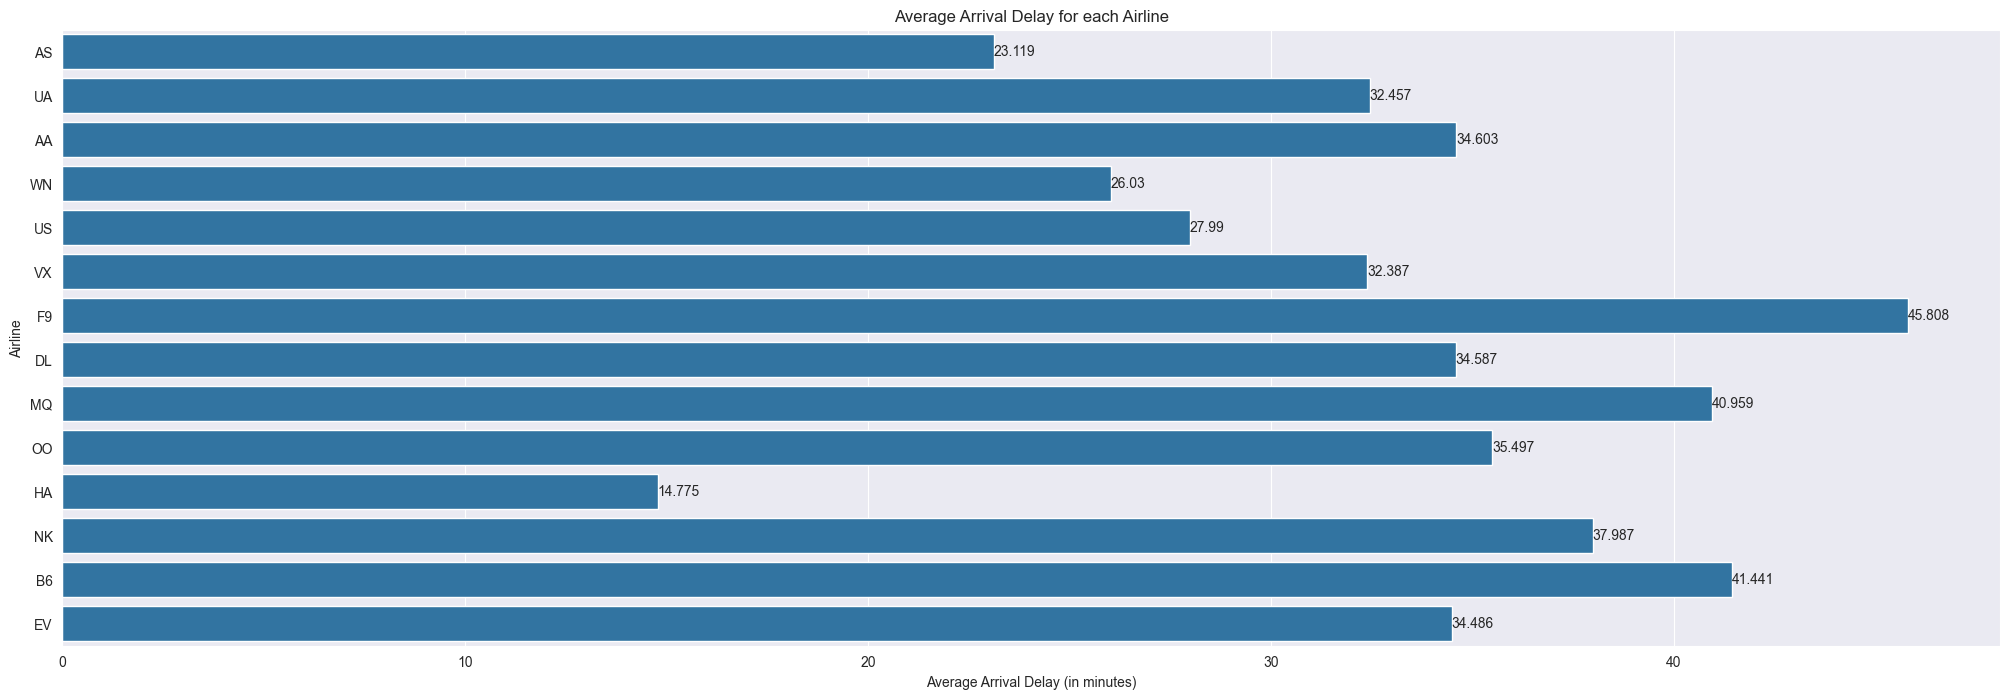

In [139]:
# list(collection.distinct('ARRIVAL_DELAY'))
queryResult = list(
    collection.aggregate([
        {'$match': {'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}}},
        {'$group': {'_id':'$AIRLINE', 'avgArrivalDelay': {'$avg': '$ARRIVAL_DELAY'}}},
        {'$project': {
            '_id':0,
            'Airline': '$_id',
            'avgArrivalDelay': {'$round': ['$avgArrivalDelay', 3]}
        }}
    ])
)


for item in queryResult:
    print(item)
    
df = pd.DataFrame(queryResult)
df.columns = ['Airline', 'AverageArrivalDelay']

plt.figure(figsize=(25,8))
bar_plot = sns.barplot(data=df, x='AverageArrivalDelay', y='Airline')


plt.xlabel('Average Arrival Delay (in minutes)')
plt.ylabel('Airline')
plt.title('Average Arrival Delay for each Airline')
bar_plot.bar_label(bar_plot.containers[0])

plt.show()

### 7. Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]

{'avgArrivalDelay': 41.932932932932935, 'DAY': 1}
{'avgArrivalDelay': 35.794701986754966, 'DAY': 2}
{'avgArrivalDelay': 39.91094890510949, 'DAY': 3}
{'avgArrivalDelay': 40.69406719085061, 'DAY': 4}
{'avgArrivalDelay': 40.50666666666667, 'DAY': 5}
{'avgArrivalDelay': 37.72260273972603, 'DAY': 6}
{'avgArrivalDelay': 29.276849642004773, 'DAY': 7}
{'avgArrivalDelay': 33.442996742671006, 'DAY': 8}
{'avgArrivalDelay': 29.541338582677167, 'DAY': 9}
{'avgArrivalDelay': 23.23248407643312, 'DAY': 10}
{'avgArrivalDelay': 31.445901639344264, 'DAY': 11}
{'avgArrivalDelay': 34.53033980582524, 'DAY': 12}
{'avgArrivalDelay': 26.832641770401107, 'DAY': 13}
{'avgArrivalDelay': 25.04553734061931, 'DAY': 14}
{'avgArrivalDelay': 25.240384615384617, 'DAY': 15}
{'avgArrivalDelay': 31.695106649937266, 'DAY': 16}
{'avgArrivalDelay': 35.7984126984127, 'DAY': 17}
{'avgArrivalDelay': 25.54357459379616, 'DAY': 18}
{'avgArrivalDelay': 23.172684458398745, 'DAY': 19}
{'avgArrivalDelay': 28.427272727272726, 'DAY': 20}

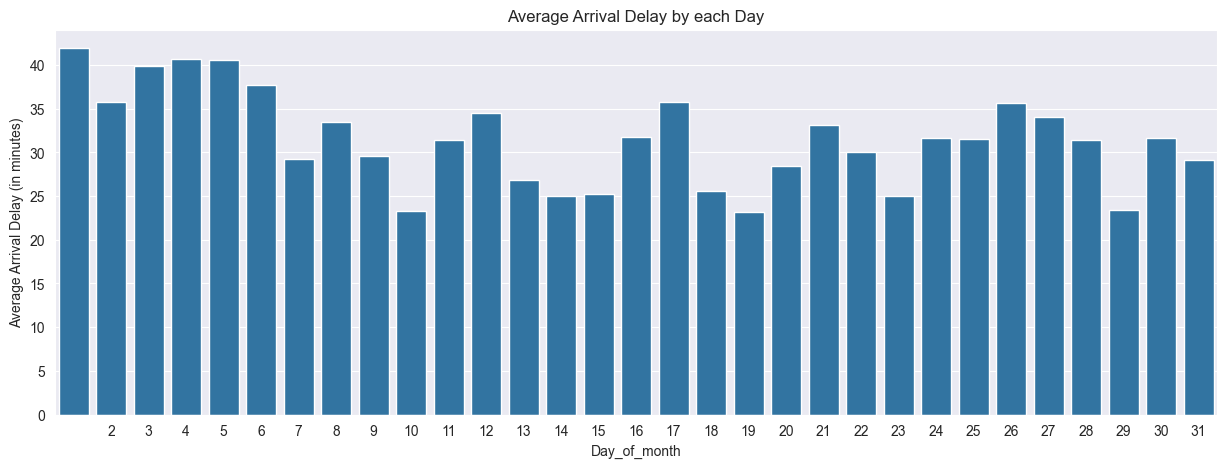

In [134]:
queryResult = list(
    collection.aggregate([
        {'$match': {'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}}},
        {'$group': {'_id':'$DAY', 'avgArrivalDelay': {'$avg': '$ARRIVAL_DELAY'}}},
        {'$sort': {'_id': 1}},
        {'$project': {'_id':0, 'DAY':'$_id', 'avgArrivalDelay':1}}
    ])
)


for item in queryResult:
    print(item)

df = pd.DataFrame(queryResult)
df.columns = ['AverageArrivalDelay', 'Day']

plt.figure(figsize=(15,5))
plt.xticks(ticks=df['Day'], rotation=0)
line_plot = sns.barplot(data=df, x='Day', y='AverageArrivalDelay')


plt.xlabel('Day_of_month')
plt.ylabel('Average Arrival Delay (in minutes)')
plt.title('Average Arrival Delay by each Day')

plt.show()

### 8. Write a MongoDB aggregation pipeline to find the top 10 airports with the highest average total delay (DEPARTURE_DELAY + ARRIVAL DELAY).

In [58]:
list(
    collection.aggregate([
        {
            '$match': {
                '$and':[
                    {'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}}, 
                    {'DEPARTURE_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}}
                ]
            }
        },
        {
            '$project': {
                'AIRPORT': '$ORIGIN_AIRPORT',
                'totalDelay': {
                    '$add': ['$ARRIVAL_DELAY', '$DEPARTURE_DELAY']
                }
            }
        },
        {
            '$group': {'_id':'$AIRPORT', 'avgTotalDelay': {'$avg': '$totalDelay'}}
        },
        {'$sort': {'avgTotalDelay': -1}},
        {'$limit': 10}
    ])
)

[{'_id': 'CDC', 'avgTotalDelay': 1082.0},
 {'_id': 'PIH', 'avgTotalDelay': 964.0},
 {'_id': 'HOB', 'avgTotalDelay': 772.0},
 {'_id': 'ILG', 'avgTotalDelay': 551.0},
 {'_id': 'HIB', 'avgTotalDelay': 355.25},
 {'_id': 'SCE', 'avgTotalDelay': 335.0},
 {'_id': 'BRW', 'avgTotalDelay': 329.5},
 {'_id': 'DLH', 'avgTotalDelay': 312.0},
 {'_id': 'MBS', 'avgTotalDelay': 287.0},
 {'_id': 'PSG', 'avgTotalDelay': 281.0}]

### 9. Explain how you would create an index on the ORIGIN_AIRPORT and DESTINATION_AIRPORT fields to optimize queries filtering by these fields.

In [59]:
collection.create_index({'ORIGIN_AIRPORT':1, 'DESTINATION_AIRPORT':1})

'ORIGIN_AIRPORT_1_DESTINATION_AIRPORT_1'

### 10. Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]

{'avgArrivalDelay': 34.818762781186095, 'DAY_OF_WEEK': 1}
{'avgArrivalDelay': 34.68610421836228, 'DAY_OF_WEEK': 2}
{'avgArrivalDelay': 31.2832689122032, 'DAY_OF_WEEK': 4}
{'avgArrivalDelay': 30.92716089349304, 'DAY_OF_WEEK': 3}
{'avgArrivalDelay': 29.700210194429847, 'DAY_OF_WEEK': 5}


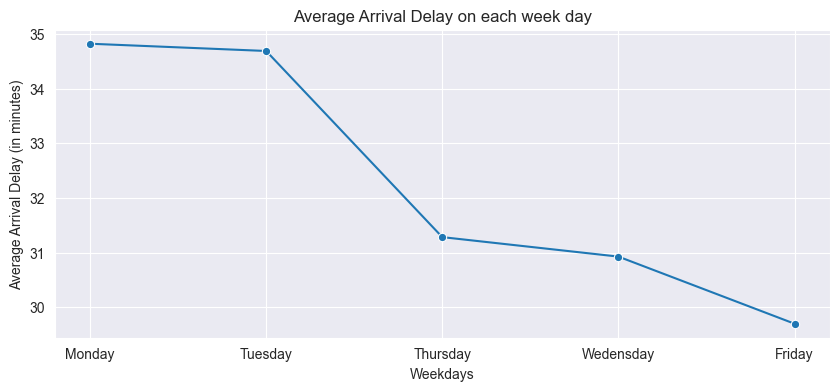

In [132]:
queryResult = list(
    collection.aggregate([
        {'$match': {
            'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0},
            'DAY_OF_WEEK': {'$gte':1, '$lte':5}
            }
        },
        {'$group': {'_id':'$DAY_OF_WEEK', 'avgArrivalDelay': {'$avg': '$ARRIVAL_DELAY'}}},
        {'$sort': {'avgArrivalDelay': -1}},
        {'$project': {'_id':0, 'DAY_OF_WEEK':'$_id', 'avgArrivalDelay':1}}
    ])
)


for item in queryResult:
    print(item)

df = pd.DataFrame(queryResult)
df.columns = ['AverageArrivalDelay', 'Day']
df['Day'] = df['Day'].map(lambda x: 'Monday' if x==1 else 'Tuesday' if x==2 else 'Wedensday' if x==3 else 'Thursday' if x==4 else 'Friday' if x==5 else 'Unknown')

plt.figure(figsize=(10,4))
sns.set_style("darkgrid")
line_plot = sns.lineplot(data=df, x='Day', y='AverageArrivalDelay', marker='o')
# bar_plot = sns.barplot(data=df, x='Day', y='AverageArrivalDelay')

plt.xlabel('Weekdays')
plt.ylabel('Average Arrival Delay (in minutes)')
plt.title('Average Arrival Delay on each week day')

plt.show()

### 11. Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]

{'cancellations': 237, 'DAY': 1}
{'cancellations': 215, 'DAY': 5}
{'cancellations': 195, 'DAY': 2}
{'cancellations': 185, 'DAY': 27}
{'cancellations': 114, 'DAY': 26}
{'cancellations': 113, 'DAY': 4}
{'cancellations': 98, 'DAY': 28}
{'cancellations': 89, 'DAY': 9}
{'cancellations': 88, 'DAY': 3}
{'cancellations': 83, 'DAY': 15}
{'cancellations': 69, 'DAY': 23}
{'cancellations': 63, 'DAY': 16}
{'cancellations': 61, 'DAY': 25}
{'cancellations': 61, 'DAY': 8}
{'cancellations': 61, 'DAY': 21}
{'cancellations': 59, 'DAY': 17}
{'cancellations': 57, 'DAY': 24}
{'cancellations': 53, 'DAY': 6}
{'cancellations': 41, 'DAY': 22}
{'cancellations': 31, 'DAY': 7}
{'cancellations': 30, 'DAY': 14}
{'cancellations': 27, 'DAY': 10}
{'cancellations': 24, 'DAY': 11}
{'cancellations': 21, 'DAY': 20}
{'cancellations': 20, 'DAY': 12}
{'cancellations': 14, 'DAY': 18}
{'cancellations': 14, 'DAY': 13}
{'cancellations': 9, 'DAY': 19}
{'cancellations': 9, 'DAY': 31}
{'cancellations': 7, 'DAY': 30}
{'cancellations'

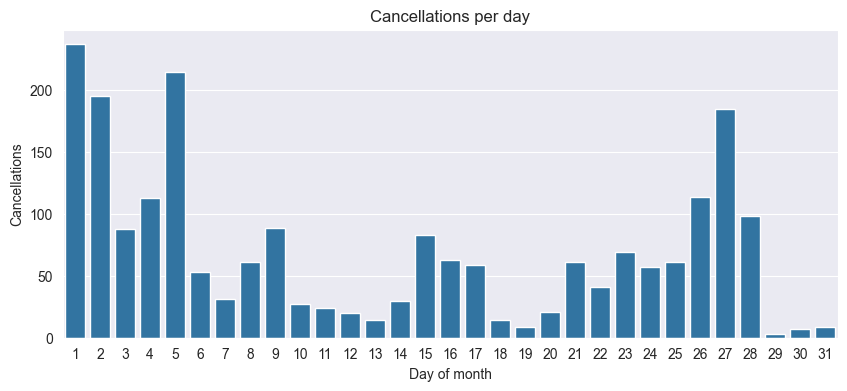

In [131]:
queryResult = list(
    collection.aggregate([
        {'$group': {'_id':'$DAY', 'cancellations': {'$sum': '$CANCELLED'}}},
        # {'$sort': {'_id':1}},
        {'$sort': {'cancellations':-1}},
        {'$project': {
            '_id': 0,
            'DAY': '$_id',
            'cancellations': 1
            }
        }
    ])
)


for item in queryResult:
    print(item)

df = pd.DataFrame(queryResult)
df.columns = ['cancellations', 'DAY']
plt.figure(figsize=(10,4))
bar_plot = sns.barplot(data=df, x='DAY', y='cancellations')


plt.xlabel('Day of month')
plt.ylabel('Cancellations')
plt.title('Cancellations per day')

plt.show()

### 12. Find the busiest airports with respect to day of week. Represent it by using suitable plot. 

{'totalFlights': 555, 'Day': 1, 'Airport': 'ATL'}
{'totalFlights': 475, 'Day': 2, 'Airport': 'ATL'}
{'totalFlights': 505, 'Day': 3, 'Airport': 'ATL'}
{'totalFlights': 556, 'Day': 4, 'Airport': 'ATL'}
{'totalFlights': 574, 'Day': 5, 'Airport': 'ATL'}
{'totalFlights': 413, 'Day': 6, 'Airport': 'ATL'}
{'totalFlights': 499, 'Day': 7, 'Airport': 'ATL'}


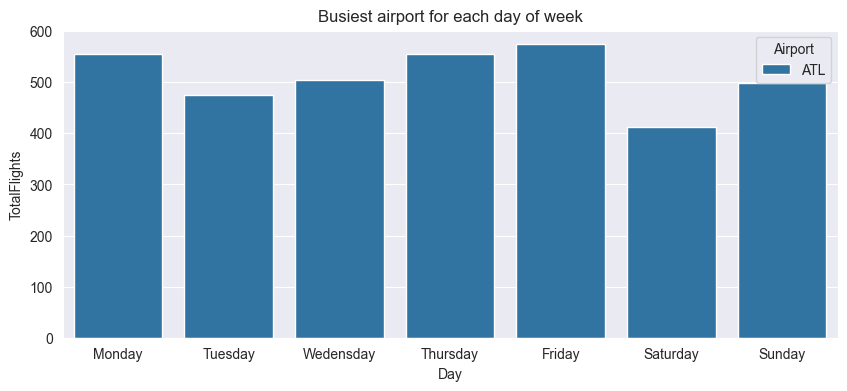

In [ ]:
queryResult = list(
    collection.aggregate([
        {'$group': {'_id':{'dayOfWeek':'$DAY_OF_WEEK', 'airport':'$ORIGIN_AIRPORT'}, 'totalFlights':{'$sum':1}}},
        {'$setWindowFields': {
            'partitionBy': '$_id.dayOfWeek',
            'sortBy': {'totalFlights':-1},
            'output': {'rank': {'$denseRank': {}}}
        }},
        {'$match': {'rank':1}},
        {'$project': {'_id':0, 'Day':'$_id.dayOfWeek', 'Airport':'$_id.airport', 'totalFlights':1}}
    ])
)


for item in queryResult:
    print(item)

df = pd.DataFrame(queryResult)
df['Day'] = df['Day'].map(lambda x: 'Monday' if x==1 else 'Tuesday' if x==2 else 'Wedensday' if x==3 else 'Thursday' if x==4 else 'Friday' if x==5 else 'Saturday' if x==6 else 'Sunday' if x==7 else 'Unknown')
# df.columns = ['cancellations', 'DAY']
plt.figure(figsize=(10,4))
bar_plot = sns.barplot(data=df, x='Day', y='totalFlights', hue='Airport')

plt.xlabel('Day')
plt.ylabel('TotalFlights')
plt.title('Busiest airport for each day of week')

plt.show()

In [ ]:
# alternate to 12

# list(collection.aggregate(
#     {'$group': {'_id':{'day':'$DAY_OF_WEEK', 'originAirport':'$ORIGIN_AIRPORT', 'destinationAirport':'$DESTINATION_AIRPORT'}, 'count':{'$sum':1}}},
#     {'$project': {}}
#     {'$sort': {'day':1, 'count':-1}},
    
# ))

### 13. Find top 10 Airlines of US. Represent it by using suitable plot.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18224\4284932834.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_flights, x='Airline', y='Total_Flights', palette='viridis', ax=axes[0, 0])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18224\4284932834.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_arrival_delay, x='Airline', y='Avg_Arrival_Delay', palette='coolwarm', ax=axes[0, 1])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18224\4284932834.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data

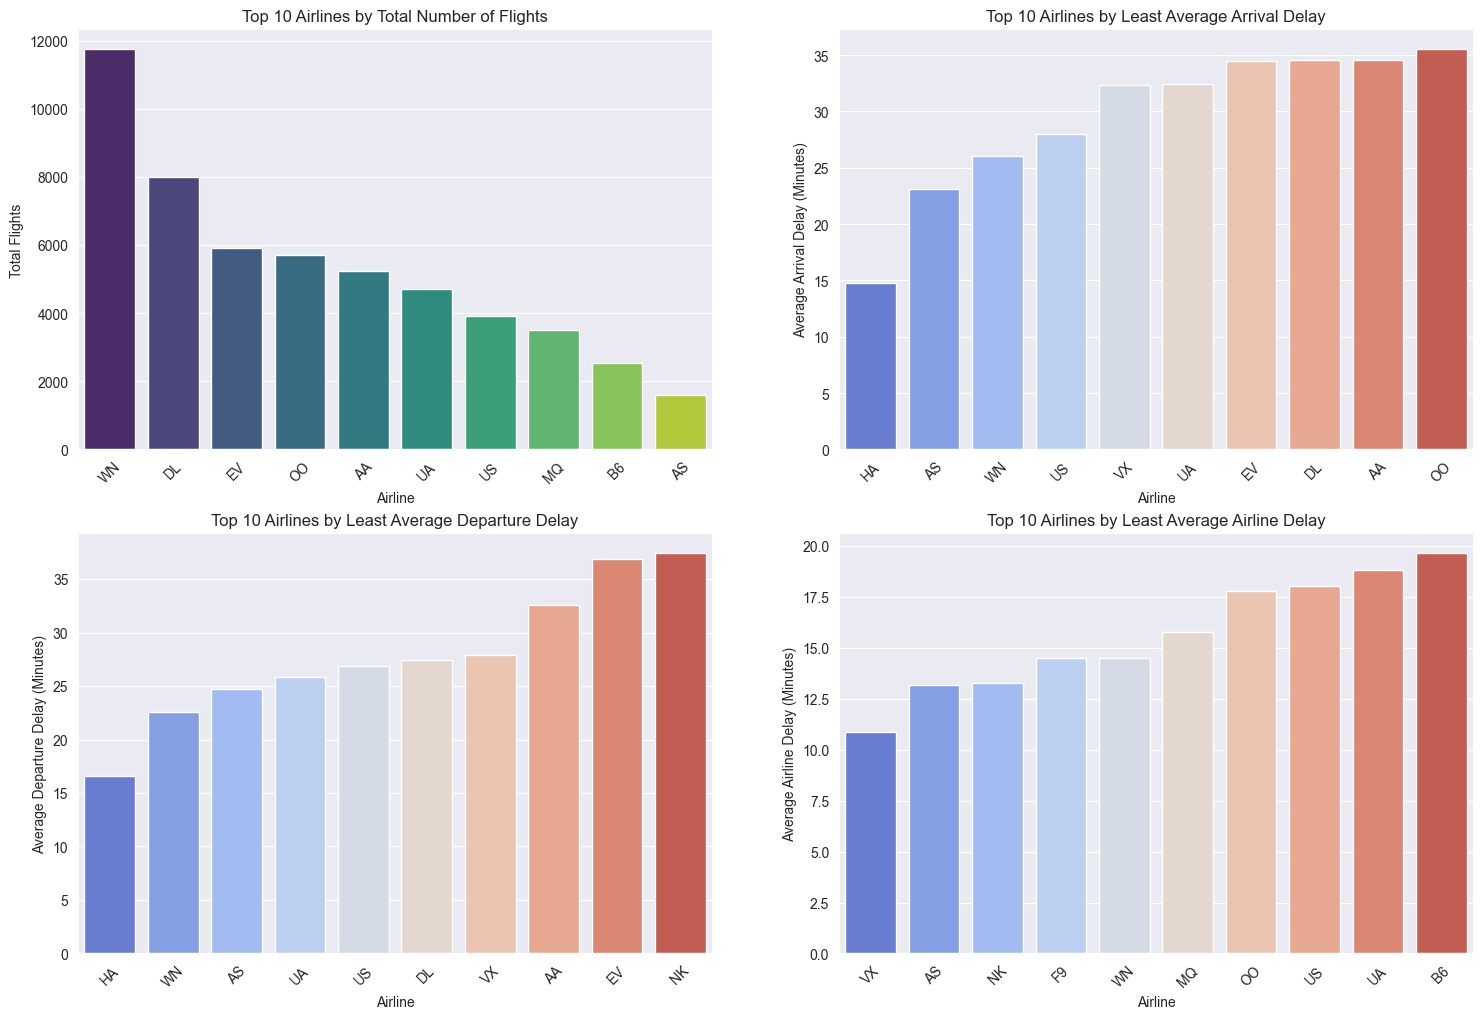

In [163]:
top_by_most_flights = list(
    collection.aggregate([
        {'$group': {'_id':'$AIRLINE', 'totalFlights':{'$sum':1}}},
        {'$sort': {'totalFlights':-1}},
        {'$limit': 10}
    ])
)

top_by_least_avg_arrival_delay = list(
    collection.aggregate([
        {'$match': {'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}}},
        {'$group': {'_id': '$AIRLINE', 'avgArrivalDelay': {'$avg': '$ARRIVAL_DELAY'}}},
        {'$sort': {'avgArrivalDelay': 1}},
        {'$limit': 10},
        {'$project': {'_id': 0, 'Airline': '$_id', 'avgArrivalDelay': {'$round': ['$avgArrivalDelay',2]}}}
    ])
)

top_by_least_avg_departure_delay = list(
    collection.aggregate([
        {'$match': {'DEPARTURE_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}}},
        {'$group': {'_id': '$AIRLINE', 'avgDepartureDelay': {'$avg': '$DEPARTURE_DELAY'}}},
        {'$sort': {'avgDepartureDelay': 1}},
        {'$limit': 10},
        {'$project': {'_id': 0, 'Airline': '$_id', 'avgDepartureDelay': {'$round': ['$avgDepartureDelay',2]}}}
    ])
)

top_by_least_avg_airline_delay = list(
    collection.aggregate([
        {'$match': {'AIRLINE_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}}},
        {'$group': {'_id': '$AIRLINE', 'avgAirlineDelay': {'$avg': '$AIRLINE_DELAY'}}},
        {'$sort': {'avgAirlineDelay': 1}},
        {'$limit': 10},
        {'$project': {'_id': 0, 'Airline': '$_id', 'avgAirlineDelay': {'$round': ['$avgAirlineDelay',2]}}}
    ])
)


# convert all data into DataFrame format
df_flights = pd.DataFrame(top_by_most_flights)
df_flights.columns = ['Airline', 'Total_Flights']

df_arrival_delay = pd.DataFrame(top_by_least_avg_arrival_delay)
df_arrival_delay.columns = ['Airline', 'Avg_Arrival_Delay']

df_departure_delay = pd.DataFrame(top_by_least_avg_departure_delay)
df_departure_delay.columns = ['Airline', 'Avg_Departure_Delay']

df_airline_delay = pd.DataFrame(top_by_least_avg_airline_delay)
df_airline_delay.columns = ['Airline', 'Avg_Airline_Delay']


# subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Top 10 Airlines by Total Number of Flights
sns.barplot(data=df_flights, x='Airline', y='Total_Flights', palette='viridis', ax=axes[0, 0])
axes[0,0].set_title('Top 10 Airlines by Total Number of Flights')
axes[0,0].set_xlabel('Airline')
axes[0,0].set_ylabel('Total Flights')
axes[0,0].tick_params(axis='x', rotation=45)

# Top 10 Airlines by Least Average Arrival Delay
sns.barplot(data=df_arrival_delay, x='Airline', y='Avg_Arrival_Delay', palette='coolwarm', ax=axes[0, 1])
axes[0,1].set_title('Top 10 Airlines by Least Average Arrival Delay')
axes[0,1].set_xlabel('Airline')
axes[0,1].set_ylabel('Average Arrival Delay (Minutes)')
axes[0,1].tick_params(axis='x', rotation=45)

# Top 10 Airlines by Least Average Departure Delay
sns.barplot(data=df_departure_delay, x='Airline', y='Avg_Departure_Delay', palette='coolwarm', ax=axes[1, 0])
axes[1,0].set_title('Top 10 Airlines by Least Average Departure Delay')
axes[1,0].set_xlabel('Airline')
axes[1,0].set_ylabel('Average Departure Delay (Minutes)')
axes[1,0].tick_params(axis='x', rotation=45)

# Top 10 airlines by Least Average Airline Delay
sns.barplot(data=df_airline_delay, x='Airline', y='Avg_Airline_Delay', palette='coolwarm', ax=axes[1, 1])
axes[1,1].set_title('Top 10 Airlines by Least Average Airline Delay')
axes[1,1].set_xlabel('Airline')
axes[1,1].set_ylabel('Average Airline Delay (Minutes)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.show()

### 14. Finding airlines that make the maximum, minimum number of cancellations.

In [85]:
list(
    collection.aggregate([
        {'$group': {'_id':'$AIRLINE', 'totalCancellations': {'$sum': '$CANCELLED'}}},
        {'$facet': {
            'maxCancellations': [{'$sort': {'totalCancellations': -1}},{'$limit':1}],
            'minCancellations': [{'$sort': {'totalCancellations': 1}}, {'$limit':1}]
        }}
    ])
)

[{'maxCancellations': [{'_id': 'MQ', 'totalCancellations': 414}],
  'minCancellations': [{'_id': 'HA', 'totalCancellations': 3}]}]

### 15. Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]

{'totalDiversions': 35, 'Airline': 'WN'}
{'totalDiversions': 25, 'Airline': 'OO'}
{'totalDiversions': 22, 'Airline': 'EV'}
{'totalDiversions': 18, 'Airline': 'DL'}
{'totalDiversions': 16, 'Airline': 'B6'}
{'totalDiversions': 12, 'Airline': 'AA'}
{'totalDiversions': 9, 'Airline': 'US'}
{'totalDiversions': 8, 'Airline': 'UA'}
{'totalDiversions': 5, 'Airline': 'MQ'}
{'totalDiversions': 1, 'Airline': 'HA'}


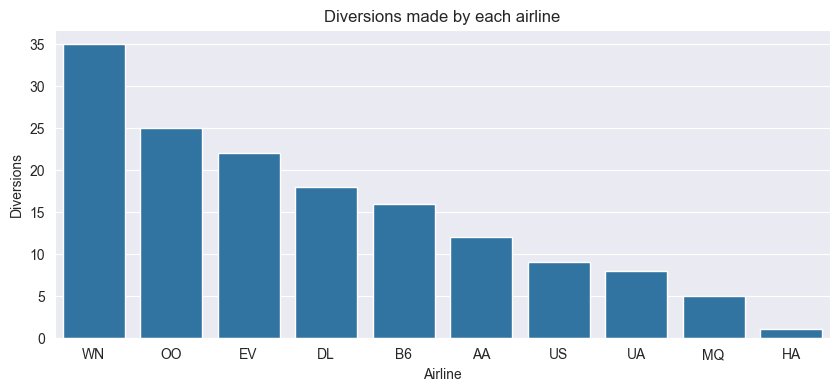

In [126]:
queryResult = list(
    collection.aggregate([
        {'$match': {'DIVERTED': {'$eq':1}}},
        {'$group': {'_id':'$AIRLINE', 'totalDiversions': {'$sum': 1}}},
        {'$sort': {'totalDiversions': -1}},
        {'$project': {'_id':0, 'Airline':'$_id', 'totalDiversions':1}}
    ])
)


for item in queryResult:
    print(item)

df = pd.DataFrame(queryResult)
df.columns = ['diversions', 'airline']
plt.figure(figsize=(10,4))
bar_plot = sns.barplot(data=df, x='airline', y='diversions')

plt.xlabel('Airline')
plt.ylabel('Diversions')
plt.title('Diversions made by each airline')

plt.show()

### 16. Finding days of month that see the most number of diversion and delays.

In [25]:
list(
    collection.aggregate([
        {'$group': {
            '_id':'$DAY', 
            'totalDiversions': {'$sum': '$DIVERTED'}, 
            'totalDelayCount':{
                '$sum': {
                    '$cond': [{
                        '$or': [
                            {'$gt': ['$ARRIVAL_DELAY',0]}, {'$gt': ['$DEPARTURE_DELAY',0]}
                        ]
                    }, 1, 0]
                }
            }
        }},
        {'$sort': {'totalDiversions':-1, 'totalDelayCount':-1}},
        {'$project': {'_id':0, 'Day':'$_id', 'totalDiversions':1, 'totalDelayCount':1}}
    ])
)

[{'totalDiversions': 15, 'totalDelayCount': 1573, 'Day': 2},
 {'totalDiversions': 13, 'totalDelayCount': 1206, 'Day': 1},
 {'totalDiversions': 12, 'totalDelayCount': 1582, 'Day': 4},
 {'totalDiversions': 11, 'totalDelayCount': 1500, 'Day': 5},
 {'totalDiversions': 9, 'totalDelayCount': 1231, 'Day': 9},
 {'totalDiversions': 8, 'totalDelayCount': 659, 'Day': 14},
 {'totalDiversions': 7, 'totalDelayCount': 1418, 'Day': 6},
 {'totalDiversions': 6, 'totalDelayCount': 1063, 'Day': 7},
 {'totalDiversions': 6, 'totalDelayCount': 845, 'Day': 23},
 {'totalDiversions': 5, 'totalDelayCount': 1511, 'Day': 3},
 {'totalDiversions': 5, 'totalDelayCount': 1123, 'Day': 8},
 {'totalDiversions': 5, 'totalDelayCount': 814, 'Day': 18},
 {'totalDiversions': 5, 'totalDelayCount': 734, 'Day': 11},
 {'totalDiversions': 5, 'totalDelayCount': 391, 'Day': 30},
 {'totalDiversions': 4, 'totalDelayCount': 966, 'Day': 12},
 {'totalDiversions': 4, 'totalDelayCount': 950, 'Day': 16},
 {'totalDiversions': 4, 'totalDelayC

### 17. Write a MongoDB query to find the flights with the shortest and longest AIR_TIME. Return the flightNumber, airline, and AIR_TIME.

In [88]:
list(
    collection.aggregate([
        {'$match': {'AIR_TIME': {'$exists':True, '$ne': float('nan')}}},
        {'$project': {'_id':0, 'FLIGHT_NUMBER':1, 'AIRLINE':1, 'AIR_TIME':1}},
        {'$facet': {
            'maxAirTime': [{'$sort': {'AIR_TIME':-1}},{'$limit':1}],
            'minAirTime': [{'$sort': {'AIR_TIME':1}}, {'$limit':1}]
        }}
    ])
)

[{'maxAirTime': [{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 15, 'AIR_TIME': 654.0}],
  'minAirTime': [{'AIRLINE': 'AS', 'FLIGHT_NUMBER': 65, 'AIR_TIME': 9.0}]}]

### 18. Finding all diverted Route from a source to destination Airport & which route is the most diverted route.

In [92]:
list(
    collection.aggregate([
        {'$group': {'_id':{'origin':'$ORIGIN_AIRPORT', 'destination':'$DESTINATION_AIRPORT'}, 'totalDiverted':{'$sum':'$DIVERTED'}}},
        # {'$sort': {'totalDiverted':-1}},
        {'$setWindowFields': {
            'sortBy': {'totalDiverted':-1},
            'output': {'rank': {'$denseRank': {}}}
        }},
        {'$match': {'rank':1}},
        {'$project': {'_id':0, 'origin':'$_id.origin', 'destination':'$_id.destination', 'totalDiverted':1}},
    ])
)

[{'totalDiverted': 2, 'origin': 'PHL', 'destination': 'SAN'},
 {'totalDiverted': 2, 'origin': 'IAH', 'destination': 'ASE'},
 {'totalDiverted': 2, 'origin': 'HOU', 'destination': 'DAL'},
 {'totalDiverted': 2, 'origin': 'STT', 'destination': 'PHL'},
 {'totalDiverted': 2, 'origin': 'TPA', 'destination': 'LGA'},
 {'totalDiverted': 2, 'origin': 'JFK', 'destination': 'SEA'},
 {'totalDiverted': 2, 'origin': 'JFK', 'destination': 'EGE'},
 {'totalDiverted': 2, 'origin': 'CLT', 'destination': 'IAH'},
 {'totalDiverted': 2, 'origin': 'ORD', 'destination': 'ASE'}]

### 19. Write a MongoDB aggregation pipeline to calculate the all aggregated values for departure delay (DEPARTURE_DELAY) and arrival delay (ARRIVAL_DELAY) for each airline, excluding flights that were either cancelled or diverted.

In [94]:
list(
    collection.aggregate([
        {
            '$match': {
                '$and':[
                    {'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan')}}, 
                    {'DEPARTURE_DELAY': {'$exists': True, '$ne': float('nan')}},
                    {'DIVERTED': 0},
                    {'CANCELLED': 0}
                ]
            }
        },
        {
            '$group': {
                '_id':'$AIRLINE', 
                'minArrivalDelay': {'$min': '$ARRIVAL_DELAY'}, 
                'maxArrivalDelay': {'$max': '$ARRIVAL_DELAY'}, 
                'avgArrivalDelay': {'$avg': '$ARRIVAL_DELAY'}, 
                'medianArrivalDelay': {'$median': {'input':'$ARRIVAL_DELAY', 'method':'approximate'}},
                'minDepartureDelay': {'$min': '$DEPARTURE_DELAY'}, 
                'maxDepartureDelay': {'$max': '$DEPARTURE_DELAY'}, 
                'avgDepartureDelay': {'$avg': '$DEPARTURE_DELAY'}, 
                'medianDepartureDelay': {'$median': {'input':'$DEPARTURE_DELAY', 'method':'approximate'}}
            }
        },
        {
            '$project': {
                '_id':0,
                'airline':'$_id',
                'minArrivalDelay': 1, 
                'maxArrivalDelay': 1, 
                'avgArrivalDelay': {'$round': ['$avgArrivalDelay', 2]}, 
                'medianArrivalDelay': 1,
                'minDepartureDelay': 1, 
                'maxDepartureDelay': 1, 
                'avgDepartureDelay': {'$round': ['$avgDepartureDelay', 2]}, 
                'medianDepartureDelay': 1
            }
        }
    ])
)

[{'minArrivalDelay': -76.0,
  'maxArrivalDelay': 522.0,
  'medianArrivalDelay': -1.0,
  'minDepartureDelay': -24.0,
  'maxDepartureDelay': 468.0,
  'medianDepartureDelay': -1.0,
  'airline': 'B6',
  'avgArrivalDelay': 13.96,
  'avgDepartureDelay': 15.89},
 {'minArrivalDelay': -50.0,
  'maxArrivalDelay': 571.0,
  'medianArrivalDelay': -1.0,
  'minDepartureDelay': -24.0,
  'maxDepartureDelay': 526.0,
  'medianDepartureDelay': -2.0,
  'airline': 'EV',
  'avgArrivalDelay': 10.88,
  'avgDepartureDelay': 11.42},
 {'minArrivalDelay': -45.0,
  'maxArrivalDelay': 511.0,
  'medianArrivalDelay': 3.0,
  'minDepartureDelay': -25.0,
  'maxDepartureDelay': 494.0,
  'medianDepartureDelay': 0.0,
  'airline': 'MQ',
  'avgArrivalDelay': 19.23,
  'avgDepartureDelay': 16.76},
 {'minArrivalDelay': -50.0,
  'maxArrivalDelay': 542.0,
  'medianArrivalDelay': -2.0,
  'minDepartureDelay': -36.0,
  'maxDepartureDelay': 540.0,
  'medianDepartureDelay': -3.0,
  'airline': 'OO',
  'avgArrivalDelay': 10.15,
  'avgDep

### 20. Write a MongoDB query to find all flights that were delayed due to WEATHER_DELAY but were not cancelled or diverted. Include the flightNumber, airline, originAirport, and destinationAirport in the results.

In [26]:
list(
    collection.find({
            'WEATHER_DELAY': {'$exists': True, '$ne': float('nan'), '$gt': 0}, 
            'CANCELLED': {'$ne': 1},
            'DIVERTED': {'$ne': 1}
        }, {
            '_id':0, 'FLIGHT_NUMBER':1, 'AIRLINE':1, 'ORIGIN_AIRPORT':1, 'DESTINATION_AIRPORT':1
        }
    ).limit(10)
)

[{'AIRLINE': 'UA',
  'FLIGHT_NUMBER': 532,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'DCA'},
 {'AIRLINE': 'US',
  'FLIGHT_NUMBER': 1784,
  'ORIGIN_AIRPORT': 'BWI',
  'DESTINATION_AIRPORT': 'PHX'},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3019,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'OKC'},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3564,
  'ORIGIN_AIRPORT': 'GSO',
  'DESTINATION_AIRPORT': 'LGA'},
 {'AIRLINE': 'UA',
  'FLIGHT_NUMBER': 1667,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'PDX'},
 {'AIRLINE': 'DL',
  'FLIGHT_NUMBER': 1788,
  'ORIGIN_AIRPORT': 'ATL',
  'DESTINATION_AIRPORT': 'MEM'},
 {'AIRLINE': 'DL',
  'FLIGHT_NUMBER': 424,
  'ORIGIN_AIRPORT': 'JFK',
  'DESTINATION_AIRPORT': 'LAX'},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3201,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'BNA'},
 {'AIRLINE': 'UA',
  'FLIGHT_NUMBER': 1718,
  'ORIGIN_AIRPORT': 'LAX',
  'DESTINATION_AIRPORT': 'KOA'},
 {'AIRLINE': 'DL',
  'FLIGHT_NUMBER': 338,
  'ORIGIN_AIRPORT': 'DT

### 21. Write a MongoDB query to find all flights that were delayed both at departure (DEPARTURE_DELAY) and arrival (ARRIVAL_DELAY). Return the count of such Flights which are delayed.

In [97]:
list(
    collection.aggregate([
        {'$match': {'DEPARTURE_DELAY': {'$gt':0},'ARRIVAL_DELAY': {'$gt': 0}}},
        {'$count': 'countDelayedFlights'}
    ])
)

[{'countDelayedFlights': 16481}]

### 22. Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined time intervals (e.g., every hour) throughout the day. Generate a Suitable Plot.

    Hour  ArrivalCount  DepartureCount
0    0.0           754             183
1    1.0           217              78
2    2.0            76              26
3    3.0            41               7
4    4.0            83              58
5    5.0           314            1598
6    6.0           636            3362
7    7.0          1682            3214
8    8.0          2458            3484
9    9.0          3041            3275
10  10.0          3311            3337
11  11.0          3177            3481
12  12.0          3344            3196
13  13.0          3221            3470
14  14.0          3399            3270
15  15.0          3355            3276
16  16.0          3630            3241
17  17.0          3124            3605
18  18.0          3419            3154
19  19.0          3325            3041
20  20.0          3442            2428
21  21.0          3154            1743
22  22.0          2644             954
23  23.0          1946             418
24  24.0            18   

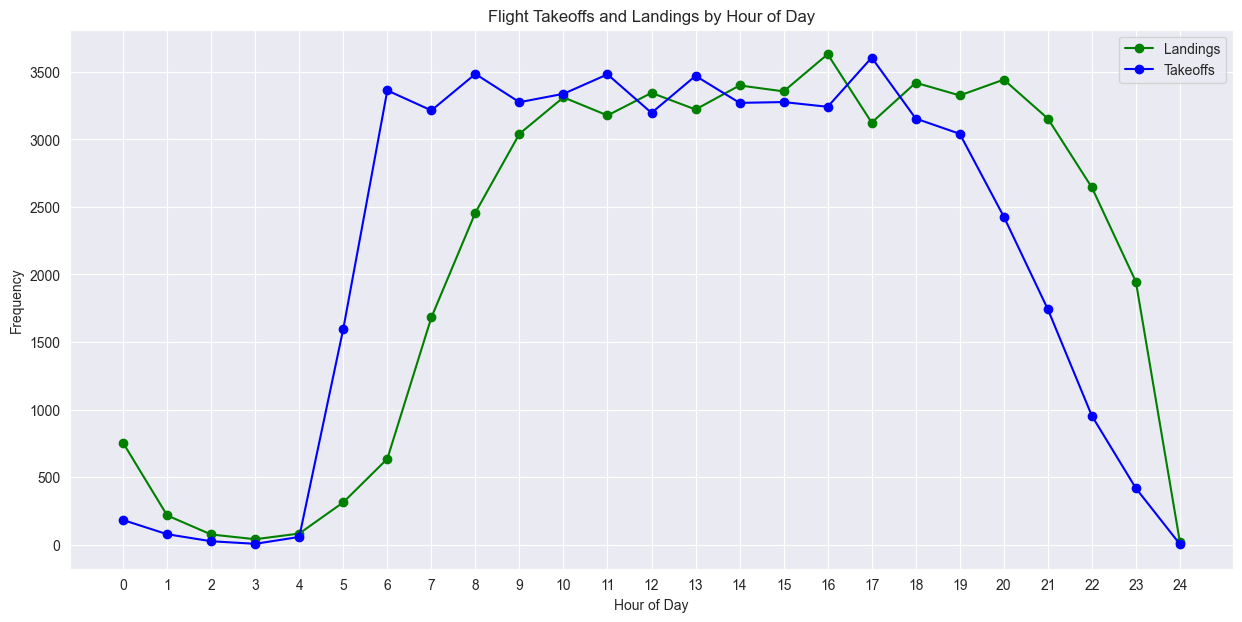

In [121]:
queryResult = list(
    collection.aggregate([
        {'$project': {
            'departureHour': {'$floor': {'$divide': ['$DEPARTURE_TIME', 100]}},
            'arrivalHour': {'$floor': {'$divide': ['$ARRIVAL_TIME', 100]}}
        }},
        {
            '$facet': {
                'arrivalCounts': [
                    {'$group': {'_id': '$arrivalHour', 'count': {'$sum': 1}}},
                    {'$sort': {'_id': 1}}
                ],
                'departureCounts': [
                    {'$group': {'_id': '$departureHour', 'count': {'$sum': 1}}},
                    {'$sort': {'_id': 1}}
                ]
            }
        }
    ])
)



arrival_df = pd.DataFrame(queryResult[0]['arrivalCounts'])
departure_df = pd.DataFrame(queryResult[0]['departureCounts'])

arrival_df.columns = ['Hour', 'ArrivalCount']
arrival_df = arrival_df.dropna()       # some Hour values were NaN, so dropping them
departure_df.columns = ['Hour', 'DepartureCount']
departure_df = departure_df.dropna()
temp_df = arrival_df.merge(departure_df)
print(temp_df)


plt.figure(figsize=(15, 7))
plt.plot(arrival_df['Hour'], arrival_df['ArrivalCount'], marker='o', color='green', label='Landings')
plt.plot(departure_df['Hour'], departure_df['DepartureCount'], marker='o', color='blue', label='Takeoffs')

plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Flight Takeoffs and Landings by Hour of Day')
plt.legend()
sns.set_style("darkgrid")
plt.xticks(ticks=arrival_df['Hour'], rotation=0)

plt.show()

### 23. Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined week of day. Generate a Suitable Plot.

   _id  takeoffCount  landingCount
0    1          8047          8024
1    2          7423          7414
2    3          7452          7441
3    4          8098          8084
4    5          8756          8744
5    6          6705          6692
6    7          7422          7412


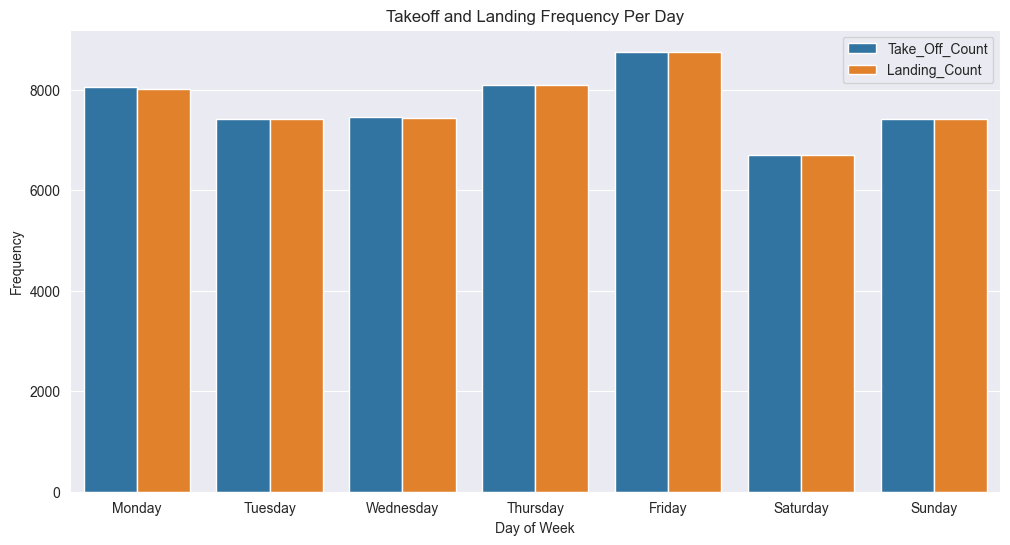

In [21]:
queryResult = list(
    collection.aggregate([
        {'$group': {
            '_id':'$DAY_OF_WEEK',
            'takeoffCount': {'$sum': {'$cond': [{'$gte': ['$DEPARTURE_TIME', 0]}, 1, 0]}},
            'landingCount': {'$sum': {'$cond': [{'$gte': ['$ARRIVAL_TIME', 0]}, 1, 0]}}
            }},
        {'$sort': {'_id':1}}
    ])
)


df = pd.DataFrame(queryResult)
print(df)
df.columns = ['DAY', 'Take_Off_Count', 'Landing_Count']
df['DAY'] = df['DAY'].map(lambda x: 'Monday' if x==1 else 'Tuesday' if x==2 else 'Wednesday' if x==3 else 'Thursday' if x==4 else 'Friday' if x==5 else 'Saturday' if x==6 else 'Sunday' if x==7 else 'Unknown')

df_melted = df.melt(id_vars='DAY', value_vars=['Take_Off_Count', 'Landing_Count'], var_name='Type', value_name='Count')
# print(df_melted)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='DAY', y='Count', hue='Type')

plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Takeoff and Landing Frequency Per Day')
sns.set_style("darkgrid")
plt.legend()

plt.show()

### 24. Write a MongoDB query to find all flights that departed between 6 AM and 12 PM (noon) local time, regardless of the date. Return the flightNumber, airline, and departureTime. Generate a Bar Plot using Time (x-axis) and Frequency (y-axis).

      AIRLINE  FLIGHT_NUMBER  DEPARTURE_TIME
0          EV           5170           954.0
1          OO           5166           924.0
2          UA            321           947.0
3          WN           2685           633.0
4          MQ           3196          1051.0
...       ...            ...             ...
20225      AA           1349           627.0
20226      B6           1567          1029.0
20227      AA           1113           857.0
20228      US            661           621.0
20229      DL           1318          1003.0

[20230 rows x 3 columns]


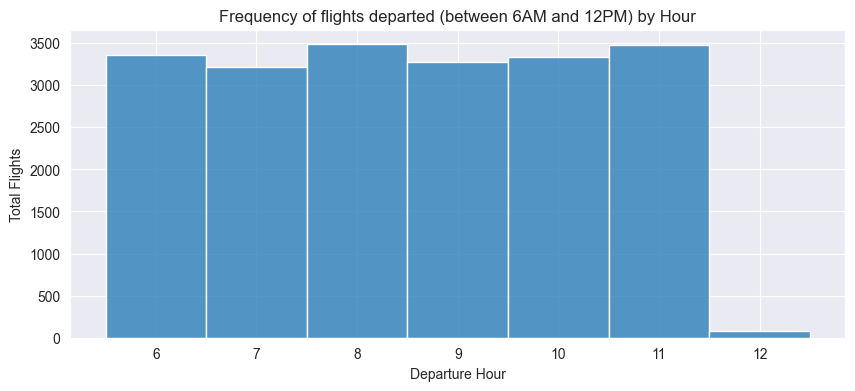

In [118]:
queryResult = list(
    collection.aggregate([
        {'$match': {'DEPARTURE_TIME': {'$gte':600, '$lte':1200}}},
        {'$project': {'_id':0, 'FLIGHT_NUMBER':1, 'AIRLINE':1, 'DEPARTURE_TIME':1}},
    ])
)


df = pd.DataFrame(queryResult)
print(df)
df['DEPARTURE_HOUR'] = df['DEPARTURE_TIME']//100

plt.figure(figsize=(10,4))
histplot = sns.histplot(data=df['DEPARTURE_HOUR'], discrete=True, bins=range(6, 13))

plt.xlabel('Departure Hour')
plt.ylabel('Total Flights')
plt.title('Frequency of flights departed (between 6AM and 12PM) by Hour')

plt.show()

### 25. When is the best time of day/day of week/time of a year to fly with minimum delays?

{'_id': 0.0, 'avgDelay': 220.68}
{'_id': 1.0, 'avgDelay': 240.5121951219512}
{'_id': 2.0, 'avgDelay': 291.05882352941177}
{'_id': 3.0, 'avgDelay': 75.0}
{'_id': 4.0, 'avgDelay': 385.2}
{'_id': 5.0, 'avgDelay': 49.93421052631579}
{'_id': 6.0, 'avgDelay': 43.801781737193764}
{'_id': 7.0, 'avgDelay': 44.61577181208054}
{'_id': 8.0, 'avgDelay': 56.35}
{'_id': 9.0, 'avgDelay': 67.21552723059096}
{'_id': 10.0, 'avgDelay': 68.26398429833169}
{'_id': 11.0, 'avgDelay': 71.37534246575342}
{'_id': 12.0, 'avgDelay': 75.20092592592593}
{'_id': 13.0, 'avgDelay': 72.85085574572128}
{'_id': 14.0, 'avgDelay': 75.33279352226721}
{'_id': 15.0, 'avgDelay': 79.15071770334929}
{'_id': 16.0, 'avgDelay': 70.90981012658227}
{'_id': 17.0, 'avgDelay': 77.71942446043165}
{'_id': 18.0, 'avgDelay': 83.96085672082718}
{'_id': 19.0, 'avgDelay': 90.75827559661278}
{'_id': 20.0, 'avgDelay': 98.62594776748105}
{'_id': 21.0, 'avgDelay': 104.75267538644471}
{'_id': 22.0, 'avgDelay': 125.50766283524904}
{'_id': 23.0, 'avgD

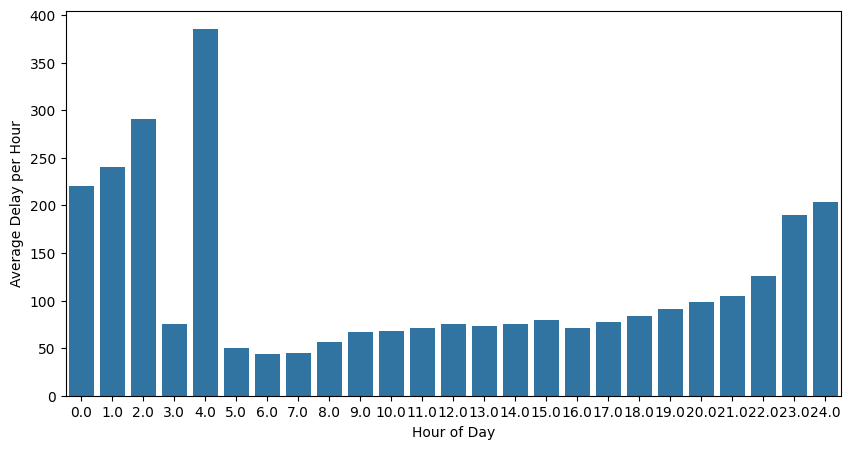

In [10]:
# finding best time of day to fly

queryResult = list(
    collection.aggregate([
        {'$match': {
            'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}, 
            'DEPARTURE_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}
        }},
        {'$project': {
            '_id':0,
            'hourOfDay':  {'$floor': {'$divide': ['$DEPARTURE_TIME', 100]}},
            'totalDelay': {'$add': ['$ARRIVAL_DELAY', '$DEPARTURE_DELAY']}
        }},
        {'$group': {'_id':'$hourOfDay', 'avgDelay': {'$avg': '$totalDelay'}}},
        {'$sort': {'_id':1}}
    ])
)

for record in queryResult:
    print(record)

df = pd.DataFrame(queryResult)
df.columns = ['Hour', 'Average_Delay_Per_Hour']
plt.figure(figsize=(10,5))
bar_plot = sns.barplot(data=df, x='Hour', y='Average_Delay_Per_Hour')

plt.xlabel('Hour of Day')
plt.ylabel('Average Delay per Hour')
plt.show()
# insight: least delay is arouun 6AM morning, with average total delay of 43.8 minutes

{'avgDelay': 83.59503592423253, 'DayOfWeek': 1}
{'avgDelay': 85.65494137353434, 'DayOfWeek': 2}
{'avgDelay': 78.26551880380607, 'DayOfWeek': 3}
{'avgDelay': 76.52054794520548, 'DayOfWeek': 4}
{'avgDelay': 72.89926803764378, 'DayOfWeek': 5}
{'avgDelay': 79.11367050575863, 'DayOfWeek': 6}
{'avgDelay': 87.29958599924727, 'DayOfWeek': 7}


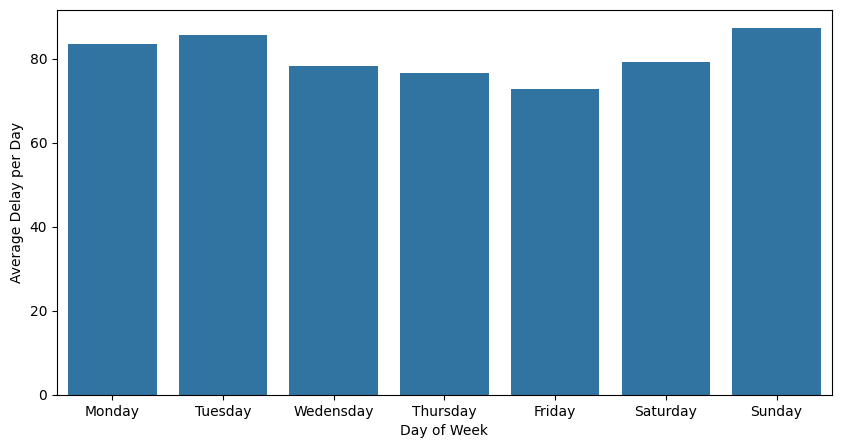

In [9]:
# finding best day of week to fly

queryResult = list(
    collection.aggregate([
        {'$match': {
            'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}, 
            'DEPARTURE_DELAY': {'$exists': True, '$ne': float('nan'), '$gte':0}
        }},
        {'$group': {'_id':'$DAY_OF_WEEK', 'avgDelay': {'$avg': {'$add': ['$ARRIVAL_DELAY', '$DEPARTURE_DELAY']}}}},
        {'$sort': {'_id':1}},
        {'$project': {
            '_id':0,
            'DayOfWeek': '$_id',
            'avgDelay': 1
        }},
    ])
)

for record in queryResult:
    print(record)

df = pd.DataFrame(queryResult)
df.columns = ['Average_Delay_of_Day', 'Day_Of_Week']
df['Day_Of_Week'] = df['Day_Of_Week'].map(lambda x: 'Monday' if x==1 else 'Tuesday' if x==2 else 'Wedensday' if x==3 else 'Thursday' if x==4 else 'Friday' if x==5 else 'Saturday' if x==6 else 'Sunday' if x==7 else 'Unknown')

plt.figure(figsize=(10,5))
bar_plot = sns.barplot(data=df, x='Day_Of_Week', y='Average_Delay_of_Day')

plt.xlabel('Day of Week')
plt.ylabel('Average Delay per Day')
plt.show()
# insight: day of week with least delay is Friday, with average delay of 72.8 minutes

{'_id': 1, 'avgDelay': 15.566352459016393}
{'_id': 2, 'avgDelay': 19.88471246959475}
{'_id': 3, 'avgDelay': 26.05433479824211}


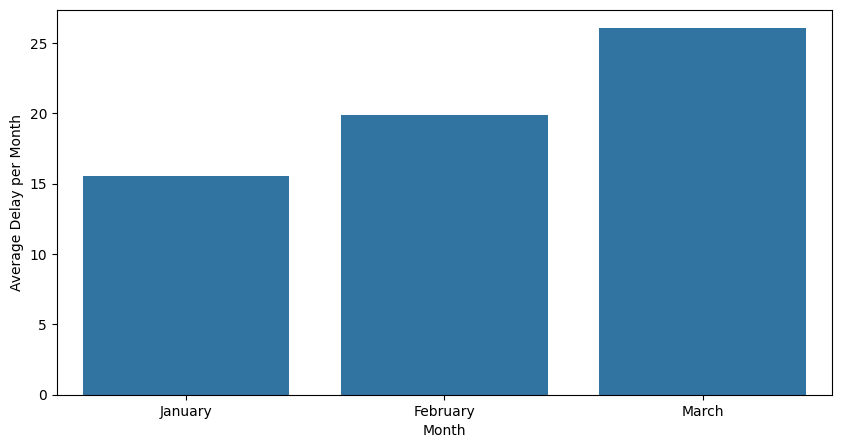

In [12]:
# finding best time of year to fly

queryResult = list(
    collection.aggregate([
        {'$match': {
            'ARRIVAL_DELAY': {'$exists': True, '$ne': float('nan')},
            'DEPARTURE_DELAY': {'$exists': True, '$ne': float('nan')}
        }},
        {'$group': {
            '_id': '$MONTH',
            'avgDelay': {'$avg': {'$add': ['$ARRIVAL_DELAY', '$DEPARTURE_DELAY']}}
        }},
        {'$sort': {'_id': 1}}
    ])
)


for record in queryResult:
    print(record)

df = pd.DataFrame(queryResult)
df.columns = ['Month', 'Average_Delay_of_Month']
df['Month'] = df['Month'].map(lambda x: 'January' if x==1 else 'February' if x==2 else 'March' if x==3 else 'April' if x==4 else 'May' if x==5 else 'June' if x==6 else 'July' if x==7 else 'Unknown')

plt.figure(figsize=(10,5))
bar_plot = sns.barplot(data=df, x='Month', y='Average_Delay_of_Month')

plt.xlabel('Month')
plt.ylabel('Average Delay per Month')
plt.show()
# insight: from data give, month with least average delay is January

### 26. Create a partitioning table “flights_partition” using partitioned by schema “Airports”

### 27. Write a MongoDB Map-Reduce function to calculate the total delay time for each airline, including all types of delays (e.g., AIR_SYSTEM_DELAY, SECURITY_DELAY, etc.).

### 28. Explain how you could use MongoDB’s Map-Reduce feature to find the most common origin-destination airport pairs with the longest delays.
